In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

<h3 style="color:#818A8A">1. Importación set de datos</h3>

In [3]:
credit = pd.read_excel ('credit.xlsx')
credit.drop (['Unnamed: 0'], axis = 1, inplace = True)
credit.head(3)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month (Y)
0,20000,female,university,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,default
1,120000,female,university,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,90000,female,university,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default


In [5]:
credit.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month (Y)'],
      dtype='object')

In [6]:
credit = credit.rename(columns = {'default payment next month (Y)':'Y'})

<h3 style="color:#818A8A">2. Análisis de datos</h3>

In [7]:
features = ['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2','PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
             'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4',
            'PAY_AMT5', 'PAY_AMT6']

x = credit.loc [:, features].values
y = credit.loc [:, ['Y']].values
x = StandardScaler().fit_transform (x)

print(x)

[[-1.12642689 -1.20840397  1.77647823 ... -0.34328006 -0.29509662
  -0.25656677]
 [-0.35402725 -0.99677208 -0.89437003 ... -0.27310016 -0.29509662
  -0.15692781]
 [-0.58574714 -0.15024451 -0.00408727 ... -0.27310016 -0.23589944
  -0.00746937]
 ...
 [-0.27678728 -1.20840397  0.88619548 ... -0.27302998 -0.23951047
  -0.20609964]
 [-0.43126721 -0.89095613 -0.00408727 ... -0.22411459 -0.18197081
  -0.16649315]
 [ 0.26389247 -0.67932424 -0.00408727 ... -0.20965753 -0.29438625
   0.0036902 ]]


In [33]:
pca = PCA (n_components = 2)
principalComponents = pca.fit_transform (x)
principalDf = pd.DataFrame (data = principalComponents,
                            columns = ['principal_component_1', 'principal_component_2'])

principalDf.head(10)

,principal_component_1,principal_component_2
0,-1.870261,-0.761329
1,-0.767830,-2.018226
2,-0.832976,-0.968937
3,-0.222358,-0.818195
4,-0.713466,0.111324
5,-0.213885,-0.812270
6,13.819347,6.281658
7,-1.785746,-0.355041
8,-0.697268,-1.563648
9,-2.741159,1.646889


In [36]:
finalDf = pd.concat ([principalDf, credit[['Y']]], axis = 1)
finalDf.head(10)

,principal_component_1,principal_component_2,Y
0,-1.870261,-0.761329,default
1,-0.767830,-2.018226,default
2,-0.832976,-0.968937,not default
3,-0.222358,-0.818195,not default
4,-0.713466,0.111324,not default
5,-0.213885,-0.812270,not default
6,13.819347,6.281658,not default
7,-1.785746,-0.355041,not default
8,-0.697268,-1.563648,not default
9,-2.741159,1.646889,not default


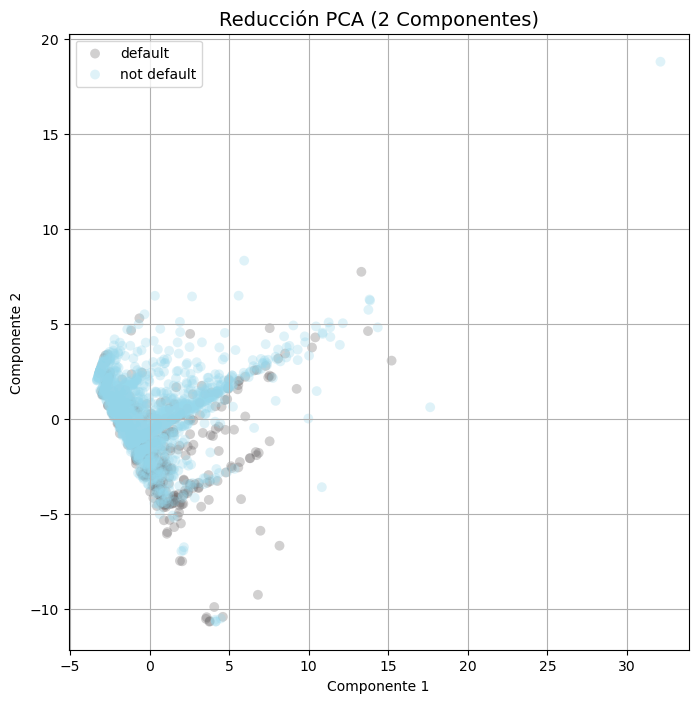

In [37]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 

ax.set_xlabel('Componente 1', fontsize = 10)
ax.set_ylabel('Componente 2', fontsize = 10)
ax.set_title('Reducción PCA (2 Componentes)', fontsize = 14)

targets = ['default', 'not default']
colors = ['#686466','#96d7eb']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Y'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal_component_1']
               , finalDf.loc[indicesToKeep, 'principal_component_2']
               , c = color
               , s = 50
               ,alpha=0.3
               ,edgecolors='none')
ax.legend(targets)
ax.grid()

In [14]:
pca.explained_variance_ratio_

array([0.3357123 , 0.20397228])

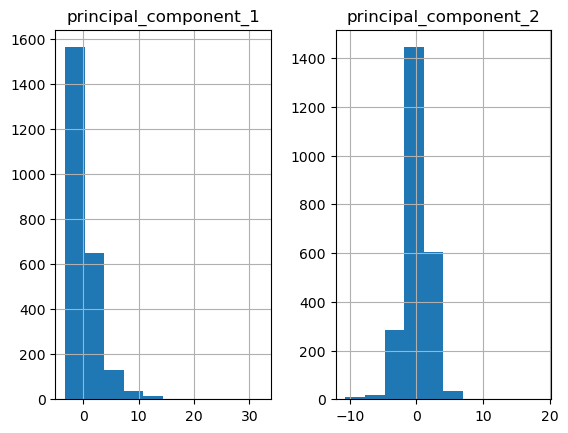

In [39]:
viz = finalDf [['principal_component_1', 'principal_component_2', 'Y']]
viz.hist()
plt.show()

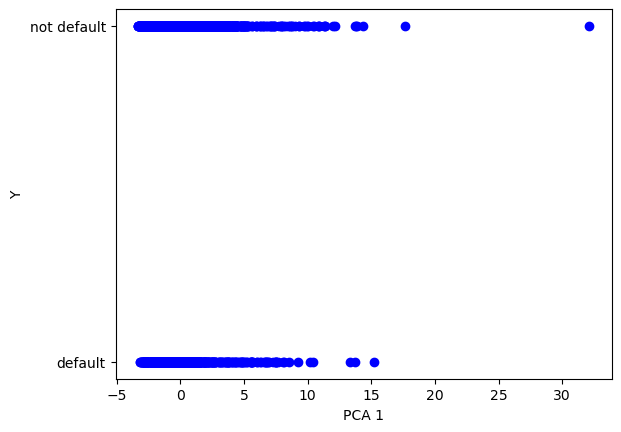

In [41]:
plt.scatter(finalDf.principal_component_1, finalDf.Y,  color='blue')
plt.xlabel("PCA 1")
plt.ylabel("Y")
plt.show()

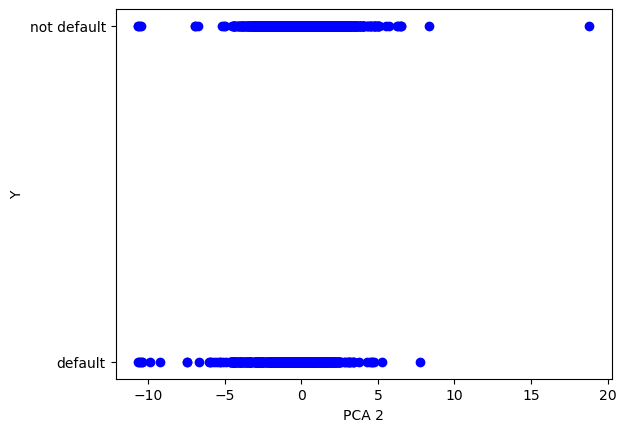

In [42]:
plt.scatter(finalDf.principal_component_2, finalDf.Y,  color='blue')
plt.xlabel("PCA 2")
plt.ylabel("Y")
plt.show()